In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from copy import copy, deepcopy
warnings.simplefilter("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['axes.unicode_minus'] = False 

In [2]:
##################### 随机生成 k 个城市 #####################
num_points = 10
np.random.seed(5213)
x = np.random.rand(num_points, 2) * 5  + 1.5
# print(x)

# 计算城市之间的距离
mat_dis = np.zeros((num_points, num_points))
for i in range(num_points):
    for j in range(num_points):
        mat_dis[i][j] = np.sqrt(np.sum(np.power(x[i]-x[j],2)))
# print(mat_dis)

dft_dis = pd.DataFrame(mat_dis)
# dft_dis

In [3]:
##################### 获取所有路径#####################
import itertools
pnt_start = 0
lst_points = list(range(num_points))
lst_paths = itertools.permutations(lst_points, len(lst_points))
lst_paths = [list(i) for i in lst_paths if i[0] == pnt_start]
for v in lst_paths:
    v.append(pnt_start)

print(len(lst_paths))
print(lst_paths[:3])

362880
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0], [0, 1, 2, 3, 4, 5, 6, 7, 9, 8, 0], [0, 1, 2, 3, 4, 5, 6, 8, 7, 9, 0]]


In [4]:
##################### 计算所有路径的距离#####################
lst_dis = list()
for path in lst_paths:
    dis_path = 0
    for i in range(len(path)-1):
        p1, p2 = path[i], path[i+1]
        x1, x2 = x[p1], x[p2]
        # dis = np.sqrt(np.sum((x1-x2)**2) # 不要用**这个做乘方，结果会有误差，用numpy.power
        dis = np.sqrt(np.sum(np.power(x1-x2, 2)))
        dis_path += dis 
    lst_dis.append(dis_path)

print(len(lst_dis))
print(lst_dis[:3])

362880
[27.608745465762524, 25.453115551354266, 30.044793511366375]


In [5]:
##################### 最短路径 #####################
min_dis = np.inf 
min_path = None 
min_id = None 

for i, v in enumerate(lst_dis):
    if v<=min_dis:
        min_id = i
        min_dis = v 
        min_path = lst_paths[i]

print(f"min_id = {min_id}")
print(f"min_dis = {min_dis}")
print(f"min_path = {min_path}")

min_id = 292505
min_dis = 12.980578005958856
min_path = [0, 8, 3, 1, 4, 6, 7, 9, 5, 2, 0]


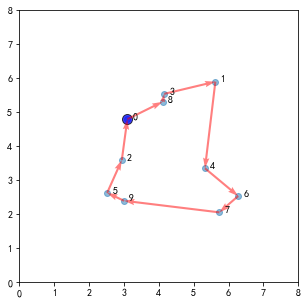

best_id = 292505
best_paths = 0 -> 8 -> 3 -> 1 -> 4 -> 6 -> 7 -> 9 -> 5 -> 2 -> 0
best_distance = 12.980578005958856


In [6]:
##################### 画出最短路径图 #####################
best_id = min_id
best_paths = min_path
best_distance = min_dis

plt.figure(figsize=(5, 5))
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.scatter(x[:, 0], x[:, 1], alpha=0.5)
plt.scatter(x[0][0], x[0][1], c="blue", edgecolors="black", alpha=0.75, s=100)

# 路径箭头
for i in range(len(best_paths)-1):
    loc1, loc2 = best_paths[i], best_paths[i+1]
    x1, y1 = x[loc1]
    x2, y2 = x[loc2]
    dx = x2 - x1
    dy = y2 - y1
    plt.quiver(x1, y1, dx, dy, angles='xy', scale=1, scale_units='xy', color="red", alpha=0.5)

# 样本点注释
for i in range(len(x)):
    x1, y1 = x[i]
    plt.annotate(i, xy=(x1, y1), xytext=(x1+0.15, y1))

# 画图
plt.show()
    
print(f"best_id = {best_id}")
print(f"best_paths = {' -> '.join([str(i) for i in best_paths])}")
print(f"best_distance = {best_distance}")